In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from docx import Document

import re


In [5]:

# Load the Word document
doc = Document("Biblio.docx")


# Connect to SQLite
conn = sqlite3.connect("citations.db")
cursor = conn.cursor()

# Create table with structured fields
cursor.execute("""
CREATE TABLE IF NOT EXISTS citations (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    authors TEXT,
    year INTEGER,
    title TEXT
)
""")

# Regex pattern: captures "Authors. (Year). Title."
pattern = re.compile(r"^(.*?)\s*\((\d{4})\)\.\s*(.*?)(?:(?:\. |$))")

for para in doc.paragraphs:
    text = para.text.strip()
    if text:
        match = pattern.match(text)
        if match:
            authors = match.group(1)
            year = int(match.group(2))
            title = match.group(3)
            cursor.execute("INSERT INTO citations (authors, year, title) VALUES (?, ?, ?)",
                           (authors, year, title))
        else:
            print(f"⚠️ Could not parse: {text}")

conn.commit()

# Show a few rows
for row in cursor.execute("SELECT * FROM citations LIMIT 5"):
    print(row)

conn.close()


⚠️ Could not parse: Bertaux, D. (1981) From the Life-History Approach to the Transformation of Sociological Practice. In: Bertaux, D., Ed., Biography and Society: The Life History Approach in the Social Sciences (pp. 29-45). Sage.
⚠️ Could not parse: Briceño, G. (2021, 26 noviembre). Aulas hospitalarias: alternativa educativa que garantiza el derecho a la educación. Servicios Sociales y A la Comunidad. https://bit.ly/3qadAHe
⚠️ Could not parse: Denckla, M. B., y Rudel, R. G. (1976a). Naming of object-drawings by dyslexic and other learning disabled children. Brain And Language, 3(1), 1-15. https://doi.org/10.1016/0093-934x(76)90001-8
⚠️ Could not parse: Denckla, M. B., y Rudel, R. G. (1976b). Rapid ‘automatized’ naming (R.A.N.): Dyslexia differentiated from other learning disabilities. Neuropsychologia, 14(4), 471-479. https://doi.org/10.1016/0028-3932(76)90075-0
⚠️ Could not parse: EDICINCO. (s.f.). Servicio de información sobre la discapacidad. EDICINCO. https://tinyurl.com/bp9dwb3h


In [ ]:
my_sql =sqlite3.connect("citations.db")
df = pd.read_sql("select * from citations", my_sql)


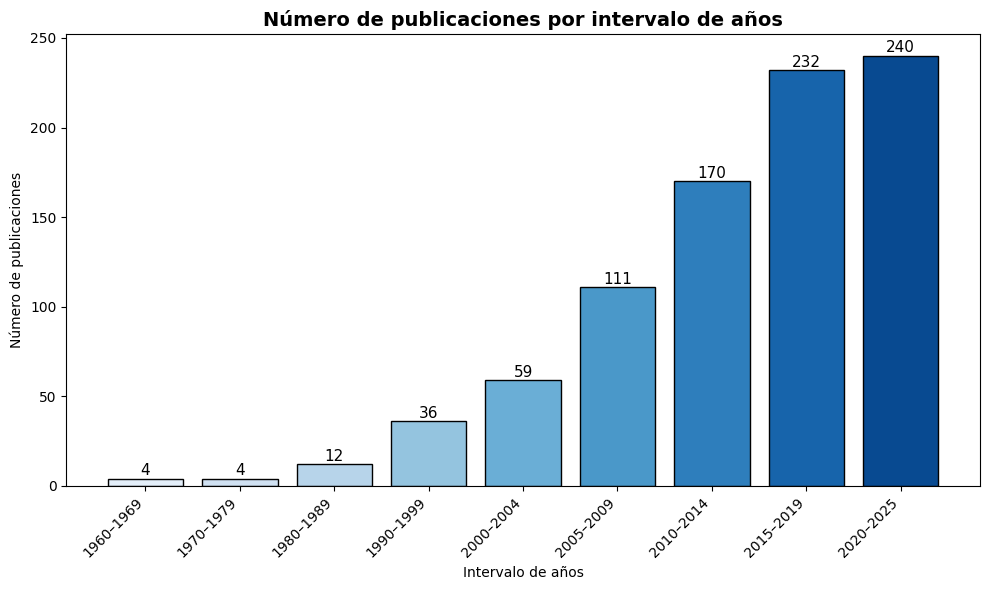

In [28]:
# Función para clasificar los años en intervalos personalizados
def clasificar_intervalo(year):
    if 1960 <= year <= 1969:
        return '1960–1969'
    elif 1970 <= year <= 1979:
        return '1970–1979'
    elif 1980 <= year <= 1989:
        return '1980–1989'
    elif 1990 <= year <= 1999:
        return '1990–1999'
    elif 2000 <= year <= 2019:  # se mantiene por bloques de 5
        start = 2000 + 5 * ((year - 2000) // 5)
        end = start + 4
        return f'{start}–{end}'
    elif 2020 <= year <= 2025:  # nuevo grupo ampliado
        return '2020–2025'
    else:
        return 'Otro'

# Aplicar la función
df['intervalo'] = df['year'].apply(clasificar_intervalo)

# Contar frecuencia por intervalo y ordenar por orden cronológico
categorias_ordenadas = ['1960–1969', '1970–1979', '1980–1989', '1990–1999',
                        '2000–2004', '2005–2009', '2010–2014', '2015–2019', '2020–2025']
conteo = df['intervalo'].value_counts().reindex(categorias_ordenadas, fill_value=0)

# Crear gráfico
plt.figure(figsize=(10, 6))
colors = sns.color_palette("Blues", len(conteo))
bars = plt.bar(conteo.index, conteo.values, color=colors, edgecolor='black')

# Añadir etiquetas sobre las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.2, int(height),
             ha='center', va='bottom', fontsize=11)

# Estética
plt.title('Número de publicaciones por intervalo de años', fontsize=14, weight='bold')
plt.xlabel('Intervalo de años')
plt.ylabel('Número de publicaciones')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar gráfico
plt.show()

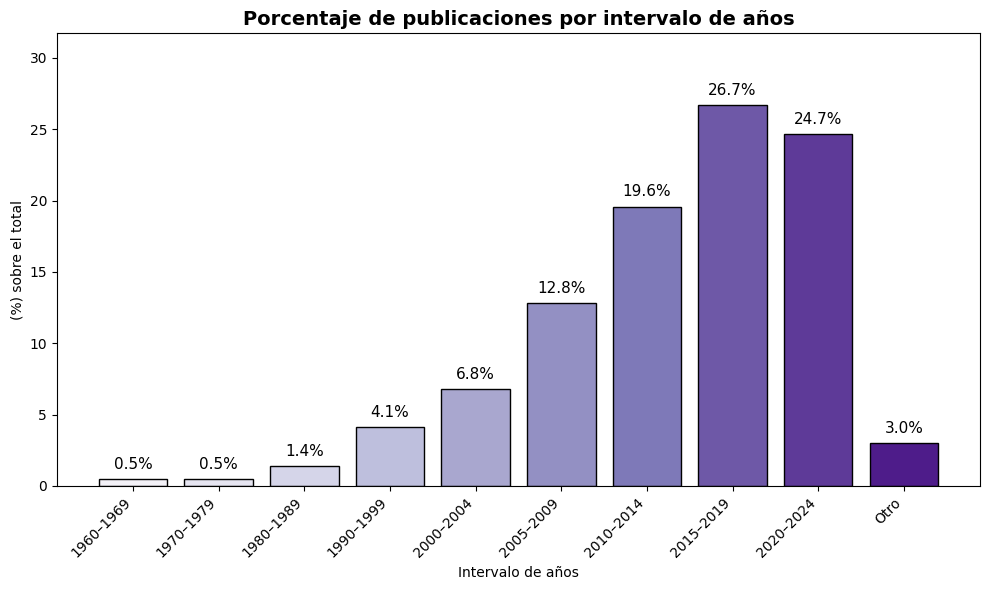

In [24]:
# Función de clasificación por intervalo personalizado
def clasificar_intervalo(year):
    if 1960 <= year <= 1969:
        return '1960–1969'
    elif 1970 <= year <= 1979:
        return '1970–1979'
    elif 1980 <= year <= 1989:
        return '1980–1989'
    elif 1990 <= year <= 1999:
        return '1990–1999'
    elif 2000 <= year <= 2024:
        start = 2000 + 5 * ((year - 2000) // 5)
        end = start + 4
        return f'{start}–{end}'
    else:
        return 'Otro'

# Aplicar la función
df['intervalo'] = df['year'].apply(clasificar_intervalo)

# Definir orden de categorías esperado
categorias_ordenadas = ['1960–1969', '1970–1979', '1980–1989', '1990–1999',
                        '2000–2004', '2005–2009', '2010–2014', '2015–2019', '2020–2024', 'Otro']

# Conteo absoluto y relativo
conteo_abs = df['intervalo'].value_counts().reindex(categorias_ordenadas, fill_value=0)
conteo_pct = (conteo_abs / conteo_abs.sum()) * 100  # calcular porcentajes

# Graficar
plt.figure(figsize=(10, 6))
colors = sns.color_palette("Purples", len(conteo_pct))
bars = plt.bar(conteo_pct.index, conteo_pct.values, color=colors, edgecolor='black')

# Etiquetas de porcentaje sobre las barras
for bar, pct in zip(bars, conteo_pct.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{pct:.1f}%',
             ha='center', va='bottom', fontsize=11)

# Estética general
plt.title('Porcentaje de publicaciones por intervalo de años', fontsize=14, weight='bold')
plt.xlabel('Intervalo de años')
plt.ylabel('(%) sobre el total')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, conteo_pct.max() + 5)  # margen superior
plt.tight_layout()

# Mostrar gráfico
plt.show()


In [11]:
df.to_excel("citations.xlsx", index=False)

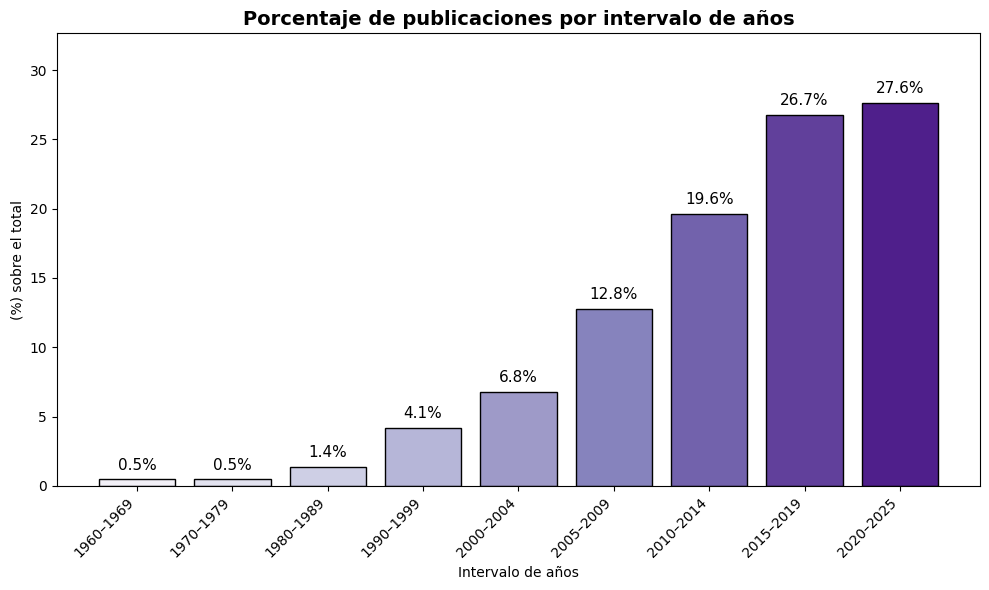

In [26]:
# Función de clasificación por intervalo personalizado
def clasificar_intervalo(year):
    if 1960 <= year <= 1969:
        return '1960–1969'
    elif 1970 <= year <= 1979:
        return '1970–1979'
    elif 1980 <= year <= 1989:
        return '1980–1989'
    elif 1990 <= year <= 1999:
        return '1990–1999'
    elif 2000 <= year <= 2019:  # se mantiene por bloques de 5
        start = 2000 + 5 * ((year - 2000) // 5)
        end = start + 4
        return f'{start}–{end}'
    elif 2020 <= year <= 2025:  # nuevo grupo ampliado
        return '2020–2025'
    else:
        return 'Otro'

# Aplicar la función
df['intervalo'] = df['year'].apply(clasificar_intervalo)

# Definir orden de categorías esperado
categorias_ordenadas = [
    '1960–1969', '1970–1979', '1980–1989', '1990–1999',
    '2000–2004', '2005–2009', '2010–2014', '2015–2019',
    '2020–2025'
]

# Conteo absoluto y relativo
conteo_abs = df['intervalo'].value_counts().reindex(categorias_ordenadas, fill_value=0)
conteo_pct = (conteo_abs / conteo_abs.sum()) * 100

# Graficar
plt.figure(figsize=(10, 6))
colors = sns.color_palette("Purples", len(conteo_pct))
bars = plt.bar(conteo_pct.index, conteo_pct.values, color=colors, edgecolor='black')

# Etiquetas de porcentaje sobre las barras
for bar, pct in zip(bars, conteo_pct.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{pct:.1f}%',
             ha='center', va='bottom', fontsize=11)

# Estética general
plt.title('Porcentaje de publicaciones por intervalo de años', fontsize=14, weight='bold')
plt.xlabel('Intervalo de años')
plt.ylabel('(%) sobre el total')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, conteo_pct.max() + 5)
plt.tight_layout()

plt.show()
